# Оценка риска ДТП.

Для каршеринговой компании требуется создать систему, которая могла бы оценить риск ДТП по выбранному маршруту движения. Под риском понимается вероятность ДТП с любым повреждением транспортного средства. Как только водитель забронировал автомобиль, сел за руль и выбрал маршрут, система должна оценить уровень риска. Если уровень риска высок, водитель увидит предупреждение и рекомендации по маршруту.

<font color='green'>Цель</font>

Выбрать оптимальную модель нейронной сети для предсказания температуры.

<font color='green'>Задачи</font>

- исследовать данные;
- подготовить данные;
- создать модель;
- исследовать основные факторы ДТП;
- Понять, помогут ли результаты моделирования и анализ важности факторов ответить на вопросы:
   
   Возможно ли создать адекватную системы оценки водительского риска при выдаче авто?
   Какие ещё факторы нужно учесть?
   Нужно ли оборудовать автомобиль какими-либо датчиками или камерой?


<font color='green'>Таблицы БД `data-science-vehicle-db`</font>

- `collisions` — общая информация о ДТП;
- `parties` - информация об участниках ДТП;
- `vehicles` - информация о пострадавших машинах.

<img src="https://pictures.s3.yandex.net/resources/1.7_2880border_1_1654004672.png">

<font color='green'>Признаки</font>

`collisions` (информация о происшествиях)

- `CASE_ID` — уникальный номер для зарегистрированного происшествия в таблице происшествий;
- `COLLISION_DATE` — дата происшествия;
- `COLLISION_TIME` — время происшествия;
- `INTERSECTION` — является ли место происшествие перекрёстком (Y — перекрёсток, N — не перекрёсток;
- `WEATHER_1` — погода;
- `COLLISION_DAMAGE` — серьёзность происшествия;
- `PRIMARY_COLL_FACTOR` — основной фактор аварии ;
- `ROAD_SURFACE` — состояние дороги;
- `LIGHTING` — освещение;
- `COUNTY_CITY_LOCATION` — номер географических районов, где произошло ДТП;
- `COUNTY_LOCATION` — названия географических районов, где произошло ДТП;
- `DIRECTION` — направление движения;
- `LOCATION_TYPE` — тип дороги;
- `PARTY_COUNT` — количество участников;
- `PCF_VIOLATION_CATEGORY` — категория нарушения;
- `TYPE_OF_COLLISION` — тип аварии;
- `MOTOR_VEHICLE_INVOLVED_WITH` — дополнительные участники ДТП;
- `ROAD_CONDITION_1` — дорожное состояние	;
- `CONTROL_CONDITION_1` — устройство управления;


`parties` (информация о происшествиях)

- `CASE_ID` — уникальный номер для зарегистрированного происшествия в таблице происшествий;
- `PARTY_NUMBER` — номер участника происшествия;
- `PARTY_TYPE` — тип участника происшествия;
- `INSURANCE_PREMIUM` — cумма страховки (тыс.дол.);
- `PARTY_DRUG_PHYSICAL` — состояние участника: физическое или с учётом принятых лекарств;
- `PARTY_SOBRIETY` — трезвость участника;
- `CELLPHONE_IN_USE` — наличие телефона в автомобиле (возможности разговаривать по громкой связи);

`vehicles` (описание автомобиля)

- `CASE_ID` — уникальный номер для зарегистрированного происшествия в таблице происшествий;
- `VEHICLE_TYPE` — тип кузова;
- `VEHICLE_TRANSMISSION` — тип КПП;
- `VEHICLE_AGE` — возраст автомобиля (в годах);


<font color='green'>Целевой признак</font>

- `at_fault` - данные о виновнике в таблице parties.

<font color='green'>Содержание</font>

<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Оценка-риска-ДТП." data-toc-modified-id="Оценка-риска-ДТП.-1">Оценка риска ДТП.</a></span><ul class="toc-item"><li><span><a href="#Подключение-к-БД.-Загрузка-таблиц-sql." data-toc-modified-id="Подключение-к-БД.-Загрузка-таблиц-sql.-1.1">Подключение к БД. Загрузка таблиц sql.</a></span></li><li><span><a href="#Проведение-первичного-исследования-таблиц" data-toc-modified-id="Проведение-первичного-исследования-таблиц-1.2">Проведение первичного исследования таблиц</a></span><ul class="toc-item"><li><span><a href="#Таблица-parties" data-toc-modified-id="Таблица-parties-1.2.1">Таблица parties</a></span></li><li><span><a href="#Таблица-collisions" data-toc-modified-id="Таблица-collisions-1.2.2">Таблица collisions</a></span></li><li><span><a href="#Таблица-vehicles" data-toc-modified-id="Таблица-vehicles-1.2.3">Таблица vehicles</a></span></li></ul></li><li><span><a href="#Статистический-анализ-факторов-ДТП" data-toc-modified-id="Статистический-анализ-факторов-ДТП-1.3">Статистический анализ факторов ДТП</a></span><ul class="toc-item"><li><span><a href="#Сезонность-аварий" data-toc-modified-id="Сезонность-аварий-1.3.1">Сезонность аварий</a></span></li><li><span><a href="#Анализ-возраста-автопарка." data-toc-modified-id="Анализ-возраста-автопарка.-1.3.2">Анализ возраста автопарка.</a></span></li><li><span><a href="#Анализ-серьезности-повреждений-исходя-из-состояния-дороги" data-toc-modified-id="Анализ-серьезности-повреждений-исходя-из-состояния-дороги-1.3.3">Анализ серьезности повреждений исходя из состояния дороги</a></span></li><li><span><a href="#Влияние-возраста-авто-на-серьезность-повреждений." data-toc-modified-id="Влияние-возраста-авто-на-серьезность-повреждений.-1.3.4">Влияние возраста авто на серьезность повреждений.</a></span></li><li><span><a href="#Категории-нарушений." data-toc-modified-id="Категории-нарушений.-1.3.5">Категории нарушений.</a></span></li><li><span><a href="#Наличие-громкой-связи-в-зависимости-от-возраста-авто." data-toc-modified-id="Наличие-громкой-связи-в-зависимости-от-возраста-авто.-1.3.6">Наличие громкой связи в зависимости от возраста авто.</a></span></li><li><span><a href="#Анализ-серьезности-повреждений-исходя-из-состояния-виновника." data-toc-modified-id="Анализ-серьезности-повреждений-исходя-из-состояния-виновника.-1.3.7">Анализ серьезности повреждений исходя из состояния виновника.</a></span></li></ul></li><li><span><a href="#Создайте-модель-для-оценки-водительского-риска" data-toc-modified-id="Создайте-модель-для-оценки-водительского-риска-1.4">Создайте модель для оценки водительского риска</a></span><ul class="toc-item"><li><span><a href="#Выгрузка-данных-и-выбор-признаков" data-toc-modified-id="Выгрузка-данных-и-выбор-признаков-1.4.1">Выгрузка данных и выбор признаков</a></span></li><li><span><a href="#Обработка-пропусков--и-укрупнение-категорий" data-toc-modified-id="Обработка-пропусков--и-укрупнение-категорий-1.4.2">Обработка пропусков  и укрупнение категорий</a></span></li><li><span><a href="#Разделение-данных-на-выборки" data-toc-modified-id="Разделение-данных-на-выборки-1.4.3">Разделение данных на выборки</a></span></li><li><span><a href="#OHE-и-масштабирование-признаков" data-toc-modified-id="OHE-и-масштабирование-признаков-1.4.4">OHE и масштабирование признаков</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-1.5">Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Искусственная-модель" data-toc-modified-id="Искусственная-модель-1.5.1">Искусственная модель</a></span></li></ul></li><li><span><a href="#Анализ-важности-факторов-ДТП" data-toc-modified-id="Анализ-важности-факторов-ДТП-1.6">Анализ важности факторов ДТП</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.7">Выводы</a></span></li></ul></li></ul></div>

## Подключение к БД. Загрузка таблиц sql.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sqlalchemy import create_engine 
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import  f1_score, confusion_matrix, make_scorer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from multiprocessing import Pool

import sweetviz as sv
import random
import shap

In [2]:
db_config = {
'user': 'praktikum_student', 
'pwd': 'Sdf4$2;d-d30pp', 
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432,
'db': 'data-science-vehicle-db' 
} 

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
) 

engine = create_engine(connection_string) 

In [3]:
query = '''

SELECT *
FROM parties
LIMIT 5
''' 
parties = pd.read_sql_query(query, con = engine) 
parties

,id,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use
0,22,3899454,1,road signs,1,29.0,had not been drinking,None,0
1,23,3899454,2,road signs,0,7.0,had not been drinking,None,0
2,29,3899462,2,car,0,21.0,had not been drinking,None,0
3,31,3899465,2,road signs,0,24.0,had not been drinking,None,0
4,41,3899478,2,road bumper,0,NaN,not applicable,not applicable,0


In [4]:
query = '''

SELECT *,
       EXTRACT(MONTH FROM collision_date) AS collision_month
FROM collisions
LIMIT 5
''' 
collisions = pd.read_sql_query(query, con = engine)
collisions

,case_id,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,collision_damage,party_count,...,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,road_surface,road_condition_1,lighting,control_device,collision_date,collision_time,collision_month
0,4083072,1942,los angeles,528.0,north,0,cloudy,highway,small damage,2,...,unsafe lane change,sideswipe,other motor vehicle,wet,normal,daylight,none,2009-01-22,07:25:00,1.0
1,4083075,4313,santa clara,0.0,None,1,clear,None,small damage,1,...,improper passing,hit object,fixed object,dry,normal,dark with street lights,functioning,2009-01-03,02:26:00,1.0
2,4083073,0109,alameda,0.0,None,1,clear,None,scratch,2,...,improper turning,broadside,other motor vehicle,dry,normal,dark with street lights,functioning,2009-01-11,03:32:00,1.0
3,4083077,0109,alameda,0.0,None,1,clear,None,scratch,2,...,automobile right of way,broadside,other motor vehicle,dry,normal,daylight,functioning,2009-01-11,10:35:00,1.0
4,4083087,4313,santa clara,0.0,None,1,clear,None,scratch,2,...,speeding,rear end,other motor vehicle,dry,None,dark with street lights,functioning,2009-01-02,22:43:00,1.0


In [5]:
query = '''

SELECT *
FROM vehicles
LIMIT 5
''' 
vehicles = pd.read_sql_query(query, con = engine) 
vehicles

,id,case_id,party_number,vehicle_type,vehicle_transmission,vehicle_age
0,1175713,5305032,2,sedan,manual,3
1,1,3858022,1,sedan,auto,3
2,1175712,5305030,1,sedan,auto,3
3,1175717,5305033,3,sedan,auto,5
4,1175722,5305034,2,sedan,auto,5


**Вывод**

Таблицы из БД загружены. 

## Проведение первичного исследования таблиц

### Таблица parties

In [6]:
parties.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5 non-null      int64  
 1   case_id              5 non-null      object 
 2   party_number         5 non-null      int64  
 3   party_type           5 non-null      object 
 4   at_fault             5 non-null      int64  
 5   insurance_premium    4 non-null      float64
 6   party_sobriety       5 non-null      object 
 7   party_drug_physical  1 non-null      object 
 8   cellphone_in_use     5 non-null      int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 488.0+ bytes


In [7]:
query = '''

SELECT party_type,
       COUNT(id)
FROM parties
GROUP BY party_type
''' 
vehicles = pd.read_sql_query(query, con = engine) 
vehicles

,party_type,count
0,building,48649
1,car,2469314
2,other,8879
3,road bumper,173488
4,road signs,48456
5,None,3622


In [8]:
query = '''

SELECT insurance_premium,
       COUNT(id)
FROM parties
GROUP BY insurance_premium
''' 
vehicles = pd.read_sql_query(query, con = engine) 
vehicles

,insurance_premium,count
0,0.0,307
1,1.0,260
2,2.0,433
3,3.0,453
4,4.0,534
...,...,...
102,102.0,52
103,103.0,39
104,104.0,34
105,105.0,16


In [9]:
query = '''

SELECT at_fault ,
       COUNT(id)
FROM parties
GROUP BY at_fault 
''' 
vehicles = pd.read_sql_query(query, con = engine) 
vehicles

,at_fault,count
0,0,1464281
1,1,1288127


In [10]:
query = '''

SELECT party_sobriety,
       COUNT(id)
FROM parties
GROUP BY party_sobriety
''' 
vehicles = pd.read_sql_query(query, con = engine) 
vehicles

,party_sobriety,count
0,"had been drinking, impairment unknown",21419
1,"had been drinking, not under influence",17650
2,"had been drinking, under influence",112413
3,had not been drinking,2124727
4,impairment unknown,232901
5,not applicable,169343
6,None,73955


In [11]:
query = '''

SELECT party_drug_physical,
       COUNT(id)
FROM parties
GROUP BY party_drug_physical
''' 
vehicles = pd.read_sql_query(query, con = engine) 
vehicles

,party_drug_physical,count
0,G,232901
1,impairment - physical,4188
2,not applicable,169343
3,sleepy/fatigued,12641
4,under drug influence,13215
5,None,2320120


In [12]:
query = '''

SELECT cellphone_in_use,
       COUNT(id)
FROM parties
GROUP BY cellphone_in_use
''' 
vehicles = pd.read_sql_query(query, con = engine) 
vehicles

,cellphone_in_use,count
0,0.0,2194946
1,1.0,45825
2,NaN,511637


### Таблица collisions

In [13]:
collisions.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   case_id                      5 non-null      object 
 1   county_city_location         5 non-null      object 
 2   county_location              5 non-null      object 
 3   distance                     5 non-null      float64
 4   direction                    1 non-null      object 
 5   intersection                 5 non-null      int64  
 6   weather_1                    5 non-null      object 
 7   location_type                1 non-null      object 
 8   collision_damage             5 non-null      object 
 9   party_count                  5 non-null      int64  
 10  primary_collision_factor     5 non-null      object 
 11  pcf_violation_category       5 non-null      object 
 12  type_of_collision            5 non-null      object 
 13  motor_vehicle_involved_w

In [14]:
query = '''

SELECT direction,
       COUNT(case_id)
FROM collisions
GROUP BY direction
''' 
vehicles = pd.read_sql_query(query, con = engine) 
vehicles

,direction,count
0,east,240574
1,north,288614
2,south,290513
3,west,239657
4,None,340642


In [15]:
query = '''

SELECT intersection,
       COUNT(case_id)
FROM collisions
GROUP BY intersection
''' 
vehicles = pd.read_sql_query(query, con = engine) 
vehicles

,intersection,count
0,0.0,1075657
1,1.0,312124
2,NaN,12219


In [16]:
query = '''

SELECT weather_1,
       COUNT(case_id)
FROM collisions
GROUP BY weather_1
''' 
vehicles = pd.read_sql_query(query, con = engine) 
vehicles

,weather_1,count
0,clear,1121048
1,cloudy,203030
2,fog,6156
3,other,1516
4,raining,57976
5,snowing,2571
6,wind,444
7,None,7259


In [17]:
query = '''

SELECT location_type,
       COUNT(case_id)
FROM collisions
GROUP BY location_type
''' 
vehicles = pd.read_sql_query(query, con = engine) 
vehicles

,location_type,count
0,highway,416531
1,intersection,26656
2,ramp,75592
3,None,881221


In [18]:
query = '''

SELECT pcf_violation_category,
       COUNT(case_id)
FROM collisions
GROUP BY pcf_violation_category
''' 
vehicles = pd.read_sql_query(query, con = engine) 
vehicles

,pcf_violation_category,count
0,automobile right of way,158291
1,brakes,303
2,dui,110476
3,fell asleep,117
4,following too closely,30033
5,hazardous parking,1746
6,impeding traffic,752
7,improper passing,12136
8,improper turning,238987
9,lights,209


### Таблица vehicles

In [19]:
vehicles.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   pcf_violation_category  23 non-null     object
 1   count                   24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [20]:
query = '''

SELECT COUNT(DISTINCT case_id)
FROM vehicles
''' 
vehicles = pd.read_sql_query(query, con = engine) 
vehicles

,count
0,792642


Информация в таблице есть не по всем происшествиям из таблицы `collisions`.

In [21]:
query = '''

SELECT vehicle_transmission,
       COUNT(id)
FROM vehicles
GROUP BY vehicle_transmission
''' 
vehicles = pd.read_sql_query(query, con = engine) 
vehicles

,vehicle_transmission,count
0,auto,502243
1,manual,495332
2,None,23659


In [22]:
query = '''

SELECT vehicle_age,
       COUNT(id)
FROM vehicles
GROUP BY vehicle_age
''' 
vehicles = pd.read_sql_query(query, con = engine) 
vehicles

,vehicle_age,count
0,0.0,40262
1,1.0,41307
2,2.0,106530
3,3.0,178550
4,4.0,125472
5,5.0,105035
6,6.0,84362
7,7.0,84282
8,8.0,77070
9,9.0,58255


**Вывод**

В таблицах иммется общий ключ - `case_id`. Есть категории и поля не совпадаюшие с описанием таблиц (например поле `PARTY_NUMBER` в `vehicles`, поле `primary_collision_factor` в `collision`, категории в `party_drug_physical`).

Все таблицы содержат пропущенные значения. Только для 792,642 происшествий из 1,400,000 имеются данные в таблице `vehicles`. Требуется укрупнение данных по новым категориям. 

##  Статистический анализ факторов ДТП

Задачи:
    
    1) Выявить сезонность аварий.
    План работы:
        - загрузить данные
        - построить график
        - сделать выводы 
        
    2) Провести анализ возраста автопарка.
    План работы:
        - загрузить данные
        - построить график
        - сделать выводы     
        
    3) Провести анализ серьезности повреждений исходя из состояния дороги.
    План работы:
        - загрузить данные
        - построить график
        - сделать выводы 
    4) Оценить влияние возраста авто на серьезность повреждений.
    План работы:
        - загрузить данные
        - построить график
        - сделать выводы 
        
    5) Найти самые частые категории нарушений.
    План работы:
        - загрузить данные
        - построить график
        - сделать выводы   
    6) Оценить наличие громкой связи в зависимости от возраста авто.
    План работы:
        - загрузить данные
        - построить график
        - сделать выводы   
    7) Провести анализ серьезности повреждений исходя из состояния виновника.
    План работы:
        - загрузить данные
        - построить график
        - сделать выводы     
        

### Сезонность аварий

Выясним в какие месяцы происходит наибольшее кол-во аварий. Посмотрим за какие периоды есть данные.

In [23]:
query = '''

SELECT EXTRACT(YEAR FROM collision_date)::int,
       COUNT(DISTINCT(EXTRACT(MONTH FROM collision_date)))
FROM collisions
GROUP BY EXTRACT(YEAR FROM collision_date)
''' 
vehicles = pd.read_sql_query(query, con = engine)
vehicles

,date_part,count
0,2009,12
1,2010,12
2,2011,12
3,2012,12
4,2013,6
5,2020,2


Т.к. данные за 2013 и 2020 года неполные, не будем включать их в анализ.

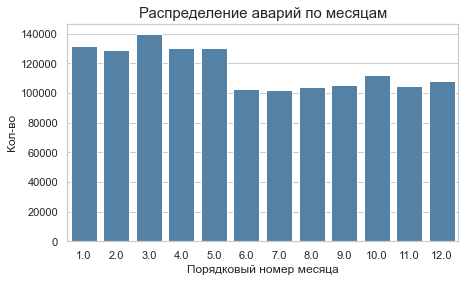

In [24]:
query = '''

SELECT EXTRACT(MONTH FROM collision_date) AS collision_month
FROM collisions
WHERE EXTRACT(YEAR FROM collision_date) NOT IN (2013, 2020)
''' 
vehicles = pd.read_sql_query(query, con = engine) 

sns.set(style="whitegrid")
plt.figure(figsize=(7, 4))
sns.countplot(x ='collision_month', data = vehicles, color ='steelblue')
plt.xlabel('Порядковый номер месяца', fontsize=12)
plt.ylabel('Кол-во', fontsize=12)
plt.title('Распределение аварий по месяцам', fontsize=15)
plt.draw()

Наибольшее кол-во аварий происходит в весенне-зимний период. 

### Анализ возраста автопарка.

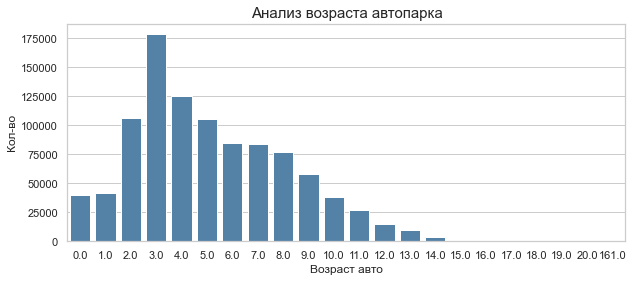

In [25]:
query = '''

SELECT vehicle_age
FROM vehicles 
''' 
vehicles = pd.read_sql_query(query, con = engine) 

sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))
sns.countplot(x ='vehicle_age', data = vehicles, color ='steelblue')
plt.xlabel('Возраст авто', fontsize=12)
plt.ylabel('Кол-во', fontsize=12)
plt.title('Анализ возраста автопарка', fontsize=15)
plt.draw()

Большая часть автопарка имеет возраст от 2 до 9 лет. 

### Анализ серьезности повреждений исходя из состояния дороги

In [26]:
query = '''

SELECT collision_damage,
       road_surface
FROM collisions 
''' 
vehicles = pd.read_sql_query(query, con = engine) 

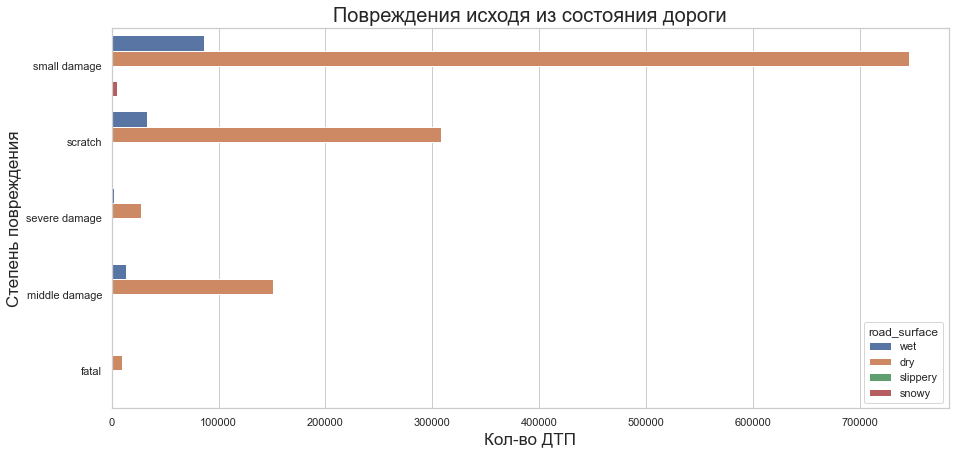

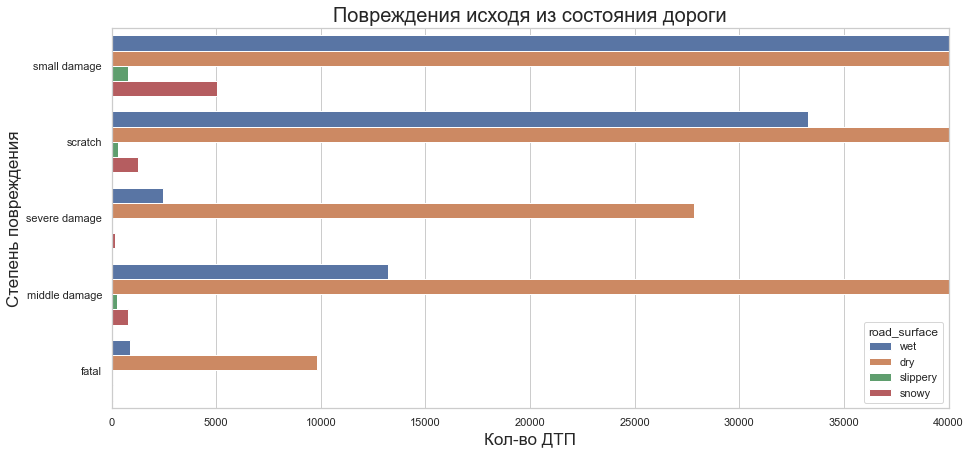

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 7))
sns.countplot(y ='collision_damage', data = vehicles, hue='road_surface')
plt.xlabel('Кол-во ДТП', fontsize=17)
plt.ylabel('Степень повреждения', fontsize=17)
plt.title('Повреждения исходя из состояния дороги', fontsize=20)
plt.draw()

sns.set(style="whitegrid")
plt.figure(figsize=(15, 7))
sns.countplot(y ='collision_damage', data = vehicles, hue='road_surface')
plt.xlabel('Кол-во ДТП', fontsize=17)
plt.ylabel('Степень повреждения', fontsize=17)
plt.title('Повреждения исходя из состояния дороги', fontsize=20)
plt.xlim([0, 40000])
plt.draw()

Для всех типов повреждений топ-3 состояния дороги выглядит следующим образом:
      
      - dry
      - wet
      - snowy

### Влияние возраста авто на серьезность повреждений.

In [28]:
query = '''

SELECT CASE 
           WHEN v.vehicle_age <= 2 THEN 'age <= 2'
           WHEN v.vehicle_age > 2 AND v.vehicle_age <= 5 THEN '2 < age <= 5'
           WHEN v.vehicle_age > 5 AND v.vehicle_age <= 8 THEN '5 < age <= 8'
           WHEN v.vehicle_age > 8 THEN 'age > 8'
       END AS age,
       c.collision_damage
FROM vehicles AS v
JOIN collisions AS c ON v.case_id = c.case_id
''' 
vehicles = pd.read_sql_query(query, con = engine) 

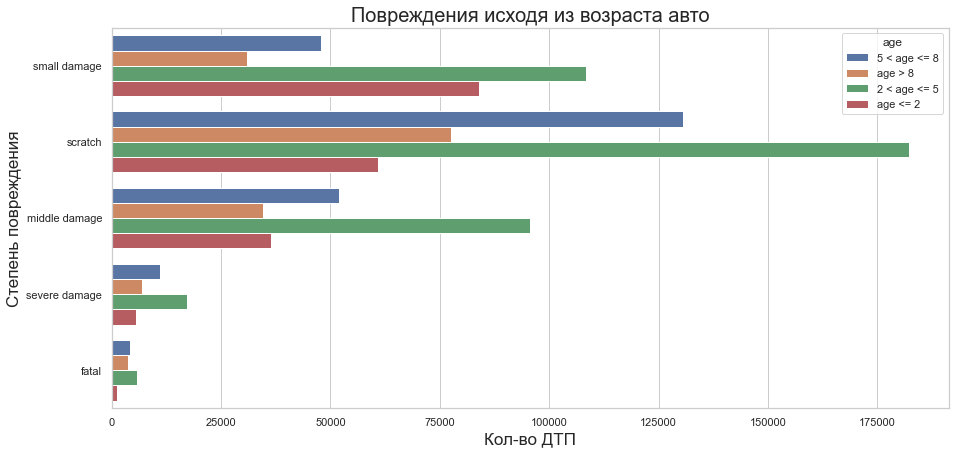

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 7))
sns.countplot(y ='collision_damage', data = vehicles, hue='age')
plt.xlabel('Кол-во ДТП', fontsize=17)
plt.ylabel('Степень повреждения', fontsize=17)
plt.title('Повреждения исходя из возраста авто', fontsize=20)
plt.draw()

Для фатального повреждения наблюдается снижение доли авто возрастом до 2 лет, тогда как для небольших повреждений - обратная ситуация.

### Категории нарушений.

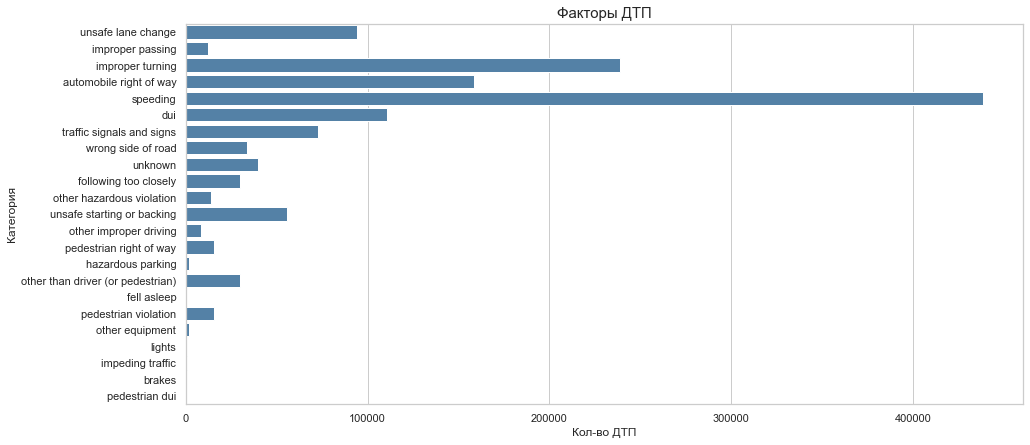

In [30]:
query = '''

SELECT pcf_violation_category
FROM collisions
''' 
vehicles = pd.read_sql_query(query, con = engine) 

sns.set(style="whitegrid")
plt.figure(figsize=(15, 7))
sns.countplot(y ='pcf_violation_category', data = vehicles, color ='steelblue')
plt.xlabel('Кол-во ДТП', fontsize=12)
plt.ylabel('Категория', fontsize=12)
plt.title('Факторы ДТП', fontsize=15)
plt.draw()

Топ 3 категорий нарушений:

    - превышение скорости
    - неправильный поворот
    - автомобильное право проезда   
    

### Наличие громкой связи в зависимости от возраста авто.

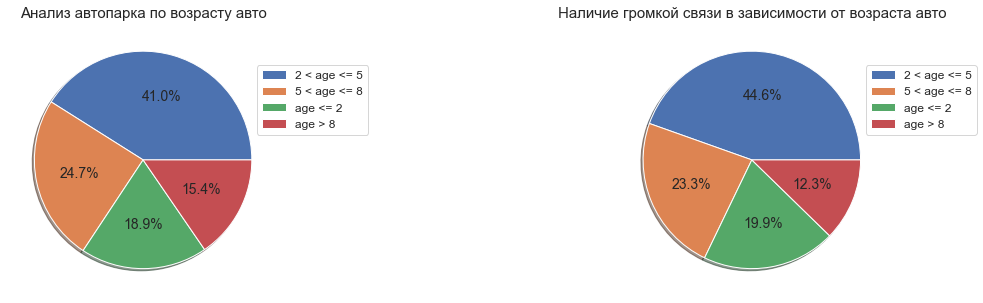

In [31]:
query = '''

SELECT CASE 
           WHEN v.vehicle_age <= 2 THEN 'age <= 2'
           WHEN v.vehicle_age > 2 AND v.vehicle_age <= 5 THEN '2 < age <= 5'
           WHEN v.vehicle_age > 5 AND v.vehicle_age <= 8 THEN '5 < age <= 8'
           WHEN v.vehicle_age > 8 THEN 'age > 8'
       END AS age,
       SUM(p.cellphone_in_use),
       COUNT(v.id)
FROM vehicles AS v
JOIN parties AS p ON v.case_id = p.case_id AND v.party_number = p.party_number
WHERE v.vehicle_age IS NOT Null
GROUP BY age
''' 
vehicles = pd.read_sql_query(query, con = engine) 
vehicles


fig, axes = plt.subplots(1, 2, figsize=(20,10))
explode = (0.05, 0) 

ax = vehicles['sum'].plot(kind='pie', fontsize=14, use_index=False, shadow=True, \
                      title='Наличие громкой связи в зависимости от возраста авто', figsize=(20,5),
                      ax=axes[1], autopct='%1.1f%%', labels=None)
ax.legend(vehicles['age'], bbox_to_anchor=(0.897,0.87), prop={'size':12})
ax.set_ylabel('')
ax.title.set_size(15) 

ax = vehicles['count'].plot(kind='pie', fontsize=14, use_index=False, shadow=True, \
                      title='Анализ автопарка по возрасту авто', figsize=(20,5),
                      ax=axes[0], autopct='%1.1f%%', labels=None)
ax.legend(vehicles['age'], bbox_to_anchor=(0.897,0.87), prop={'size':12})
ax.set_ylabel('')
ax.title.set_size(15);

Автопарк равномерно оборудован громкой связью.

### Анализ серьезности повреждений исходя из состояния виновника.

In [32]:
query = '''

SELECT CASE 
           WHEN p.party_sobriety = 'had not been drinking' THEN 'не пил'
           WHEN p.party_sobriety = 'impairment unknown' OR p.party_sobriety = 'not applicable' THEN 'не известно'
           WHEN p.party_sobriety = 'had been drinking, under influence' 
             OR p.party_sobriety = 'had been drinking, impairment unknown' 
             OR p.party_sobriety = 'had been drinking, not under influence' THEN 'пил'
       END AS party_sobriety,
       c.collision_damage
FROM (
        SELECT *
        FROM parties 
        WHERE at_fault = 1
     ) AS p
JOIN collisions AS c ON p.case_id = c.case_id
''' 
vehicles = pd.read_sql_query(query, con = engine) 

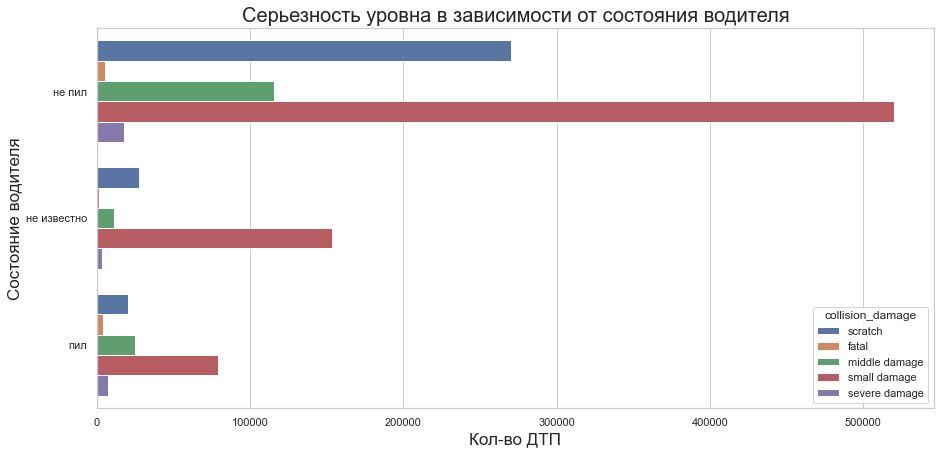

In [33]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 7))
sns.countplot(y ='party_sobriety', data = vehicles, hue='collision_damage')
plt.xlabel('Кол-во ДТП', fontsize=17)
plt.ylabel('Состояние водителя', fontsize=17)
plt.title('Серьезность уровна в зависимости от состояния водителя', fontsize=20)
plt.draw()

Для выпивших виновников ДТП повышается доля среднего урона авто. Большая часть фатального урона приходится на водителей которые не пили. 

**Вывод**

  - Наибольшее кол-во аварий происходит в весенне-зимний период. 
  - Большая часть автопарка имеет возраст от 2 до 9 лет. 
  - Для всех типов повреждений топ-3 состояния дороги выглядит следующим образом:      
      - dry
      - wet
      - snowy
  - Для фатального повреждения наблюдается снижение доли авто возрастом до 2 лет, тогда как для небольших повреждений - обратная ситуация.
  - Топ 3 категорий нарушений:

    - превышение скорости
    - неправильный поворот
    - автомобильное право проезда   
  - Автопарк равномерно оборудован громкой связью.
  - Для выпивших виновников ДТП повышается доля среднего урона авто. Большая часть фатального урона приходится на водителей которые не пили. 

## Создайте модель для оценки водительского риска

### Выгрузка данных и выбор признаков

In [34]:
query = '''

WITH collisions AS (SELECT *,
                           EXTRACT(MONTH FROM collision_date) AS collision_month
                    FROM collisions
                    WHERE case_id IN (SELECT DISTINCT case_id
                                      FROM parties
                                      WHERE at_fault = 1 AND party_type = 'car'
                                     )
                                  AND EXTRACT(YEAR FROM collision_date) = 2012
                                  AND collision_damage NOT LIKE 'scratch'
                    )
                    
SELECT *
FROM parties AS p
LEFT OUTER JOIN collisions AS c ON p.case_id = c.case_id
LEFT OUTER JOIN vehicles AS v ON p.case_id = v.case_id AND p.party_number = v.party_number
WHERE c.county_city_location IS NOT NULL 
      AND v.id IS NOT NULL
''' 
data = pd.read_sql_query(query, con = engine) 

Удалим дубликаты столбцов.

In [35]:
data = data.loc[:,~data.columns.duplicated()].copy()

In [36]:
report = sv.analyze(data)
#report.show_notebook()
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Дубликатов в данных не выявлено. Имеются пропуски и сильные корреляции между признаками.

Удалим следующие признаки, т.к. они имеют слишком много пропусков:

    - party_drug_physical
    - location_type
    
Следующие признаки имеют очень высокую корреляцию. В качестве признака оставим только один из них:

    - county_location / county_city_location - оставим county_location
    - primary_collision_factor / pcf_violation_category - оставим pcf_violation_category
    
Удалим признаки не влияющие/маловероятно влияющие на целевую переменную:

    - id_x
    - case_id
    - party_number
    - party_count
    - collision_date (в качестве признака остается collision_month)
    - collision_time
    - id_y 
    - vehicle_type
    - vehicle_transmission

In [37]:
data = data.drop(['party_drug_physical', 'location_type', 'county_city_location', 'primary_collision_factor', 'id', 'case_id',\
                 'party_number', 'party_count', 'collision_date', 'collision_time', 'vehicle_type', 'vehicle_transmission'], axis=1)

### Обработка пропусков  и укрупнение категорий

In [38]:
pd.concat(
    [
        ((data.isna().mean()*100).round(2)).reset_index().rename(columns={0:'percent_NaN'}),
        data.isna().sum().reset_index().rename(columns={0:'count_NaN'})['count_NaN']
    ],
    axis=1
)

,index,percent_NaN,count_NaN
0,party_type,0.05,27
1,at_fault,0.00,0
2,insurance_premium,2.02,1121
3,party_sobriety,1.74,970
4,cellphone_in_use,9.08,5048
5,county_location,0.00,0
6,distance,0.00,0
7,direction,23.62,13135
8,intersection,0.32,179
9,weather_1,0.27,151


In [39]:
data['party_type'].value_counts()

car            52514
road signs      1579
building         921
road bumper      507
other             68
Name: party_type, dtype: int64

Пропуски заменим имеющейся категорией 'other'.

In [40]:
data['party_type'] = data['party_type'].fillna('other')  

In [41]:
data['direction'].value_counts()

north    11813
south    11652
west      9629
east      9387
Name: direction, dtype: int64

Пропуски заменим новой категорией.

In [42]:
data['direction'] = data['direction'].fillna('unknow')  

In [43]:
data['intersection'].value_counts()

0.0    42914
1.0    12523
Name: intersection, dtype: int64

In [44]:
data['pcf_violation_category'].value_counts()

speeding                      18536
improper turning               8587
automobile right of way        7400
dui                            6367
unsafe lane change             4436
traffic signals and signs      3217
unsafe starting or backing     1543
wrong side of road             1308
following too closely          1014
pedestrian right of way         953
other hazardous violation       586
improper passing                540
other improper driving          209
other equipment                  88
unknown                          80
pedestrian violation             43
hazardous parking                34
impeding traffic                 33
brakes                           10
fell asleep                       1
lights                            1
Name: pcf_violation_category, dtype: int64

Пропуски заменим существующей категорией 'unknown'.

In [45]:
data['pcf_violation_category'] = data['pcf_violation_category'].fillna('unknown')  

In [46]:
data['type_of_collision'].value_counts()

rear end      18726
broadside     11660
sideswipe      8840
hit object     8039
head-on        3191
other          2643
overturned     2241
Name: type_of_collision, dtype: int64

Пропуски заменим существующей категорией 'other'.

In [47]:
data['type_of_collision'] = data['type_of_collision'].fillna('other')  

Укрупним категории:

In [48]:
data['insurance_premium'] = pd.qcut(data['insurance_premium'],4)

data = data.replace({'party_sobriety':{'had been drinking, under influence':'had been drinking',\
                                       'had been drinking, not under influence':'had been drinking',\
                                       'had been drinking, impairment unknown':'had been drinking'}})

Для следующих признаков заменим пропуски модой:

In [49]:
def missing_value(data, columns):
    for col in columns:
        data[col] = data[col].fillna(data[col].value_counts().index[0])
    return data

In [50]:
columns = ['insurance_premium','party_sobriety', 'cellphone_in_use', 'intersection', 'weather_1', 'motor_vehicle_involved_with',\
          'road_surface', 'road_condition_1', 'control_device', 'vehicle_age', 'lighting']
data = missing_value(data, columns)

In [51]:
data.isnull().sum()

party_type                     0
at_fault                       0
insurance_premium              0
party_sobriety                 0
cellphone_in_use               0
county_location                0
distance                       0
direction                      0
intersection                   0
weather_1                      0
collision_damage               0
pcf_violation_category         0
type_of_collision              0
motor_vehicle_involved_with    0
road_surface                   0
road_condition_1               0
lighting                       0
control_device                 0
collision_month                0
vehicle_age                    0
dtype: int64

### Разделение данных на выборки

Выделим признаки и целевой признак. 

In [52]:
features = data.drop(['at_fault'], axis=1)
target = data['at_fault']

Разделим данные на выборки.

In [53]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345, stratify=target)

Проверим размеры полученных файлов.

In [54]:
print(features_train.shape, target_train.shape, features_test.shape, target_test.shape)

(41712, 19) (41712,) (13904, 19) (13904,)


###  OHE и масштабирование признаков

Разделим колонки на два типа: числовые и категориальные.

In [55]:
numerical = ['distance', 'vehicle_age']
target = ['at_fault']
categorical  = [col for col in features_train.columns if col not in numerical+target]

In [56]:
scaler = StandardScaler()
scaler.fit(features_train[numerical])
df_scaler_train = scaler.transform(features_train[numerical])
df_scaler_test = scaler.transform(features_test[numerical]) 

df_scaler_train = pd.DataFrame(df_scaler_train, columns=numerical)
df_scaler_test = pd.DataFrame(df_scaler_test, columns=numerical)

In [57]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first')
ohe.fit(features_train[categorical])
df_ohe_train = ohe.transform(features_train[categorical])
df_ohe_test = ohe.transform(features_test[categorical]) 

df_ohe_train = pd.DataFrame(df_ohe_train, columns=ohe.get_feature_names_out())
df_ohe_test = pd.DataFrame(df_ohe_test, columns=ohe.get_feature_names_out())

Found unknown categories in columns [9] during transform. These unknown categories will be encoded as all zeros


In [58]:
features_train = pd.concat([df_scaler_train, df_ohe_train], axis=1)
features_test = pd.concat([df_scaler_test, df_ohe_test], axis=1)

## Обучение моделей

In [59]:
param_grid_lr = [{'clf__class_weight': [None, 'balanced']
                 }]
param_grid_dt = [{'clf__max_depth': range (4,10,2),
                  'clf__min_samples_leaf': range (3,10),
                  'clf__class_weight': [None, 'balanced']
                 }]
param_grid_rf = [{'clf__n_estimators': range (1,100,10),
                  'clf__max_depth': range (4,10,2),
                  'clf__class_weight': [None, 'balanced']
                 }]
param_grid_cb = [{'clf__learning_rate': [0.001,0.01,0.1,0.2,0.3],
                  'clf__depth': [2,4,6],
                  'clf__iterations':[100,250,500]
                 }]

pipe_lr = Pipeline([('clf', LogisticRegression(solver='lbfgs', max_iter=1000))])
pipe_dt = Pipeline([('clf', DecisionTreeClassifier(random_state = 12345))])
pipe_rf = Pipeline([('clf', RandomForestClassifier(random_state = 12345))])
pipe_cb = Pipeline([('clf', CatBoostClassifier(verbose=False, random_state = 12345))])

scorer = {'f1': make_scorer(f1_score)} 
jobs = -1

LR = GridSearchCV(estimator=pipe_lr,
            param_grid=param_grid_lr,
            refit='f1_score',
            cv=5) 
DT = GridSearchCV(estimator=pipe_dt,
            param_grid=param_grid_dt,
            refit='f1_score',
            cv=5) 
RF = GridSearchCV(estimator=pipe_rf,
            param_grid=param_grid_rf,
            refit='f1_score',
            cv=5) 
CB = GridSearchCV(estimator=pipe_cb,
            param_grid=param_grid_cb,
            refit='f1_score',
            cv=5) 

grids = [LR,DT,RF,CB]
grid_dict = {0: 'Logistic Regression',
             1: 'DecisionTree',
             2: 'Random Forest',
             3: 'CatBoost'}

best_f1 = 0.0
best_clf = 0
best_gs = ''

for idx, gs in enumerate(grids):
    print('\nМодель: %s' % grid_dict[idx])
    
    if gs == CB:
        gs.fit(features_train, target_train)
    else:
        gs.fit(features_train, target_train)    
    print('Лучшие параметры : %s' % gs.best_params_)
    print('Лучшее значение F1 на train: %.3f' % gs.best_score_)
    
    if gs.best_score_ > best_f1:
        best_f1 = gs.best_score_
        best_gs = gs
        best_clf = idx
print('\nМодель с лучшим значением F1 на train: %s' % grid_dict[best_clf])
print('\nПараметры лучшей модели:', best_gs.best_params_)


Модель: Logistic Regression
Лучшие параметры : {'clf__class_weight': None}
Лучшее значение F1 на train: 0.723

Модель: DecisionTree
Лучшие параметры : {'clf__class_weight': None, 'clf__max_depth': 8, 'clf__min_samples_leaf': 9}
Лучшее значение F1 на train: 0.719

Модель: Random Forest
Лучшие параметры : {'clf__class_weight': None, 'clf__max_depth': 8, 'clf__n_estimators': 41}
Лучшее значение F1 на train: 0.709

Модель: CatBoost
Лучшие параметры : {'clf__depth': 4, 'clf__iterations': 250, 'clf__learning_rate': 0.1}
Лучшее значение F1 на train: 0.729

Модель с лучшим значением F1 на train: CatBoost

Параметры лучшей модели: {'clf__depth': 4, 'clf__iterations': 250, 'clf__learning_rate': 0.1}


### Искусственная модель

Проверим модель на адекватность, сравнив с исскуственной.

In [60]:
baseline_model = DummyClassifier(strategy='most_frequent')
baseline_model.fit(features_train, target_train)
predicted_train = baseline_model.predict(features_train)
print('F1 на тестовой выборке: {:.3f}'.format(f1_score(target_train, predicted_train)))    

F1 на тестовой выборке: 0.676


**Вывод**

Лучший результат на `train` показала модель: `CatBoost`. Ее итоговый показатель  несколько лучше искусственной модели.

## Анализ важности факторов ДТП

Проверим лучшую модель на test.

In [61]:
model = CatBoostClassifier(depth=6, iterations=100, learning_rate=0.1, verbose=False)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('F1 на test: {:.3f}'.format(f1_score(target_test, predicted_test)))    

F1 на test: 0.695


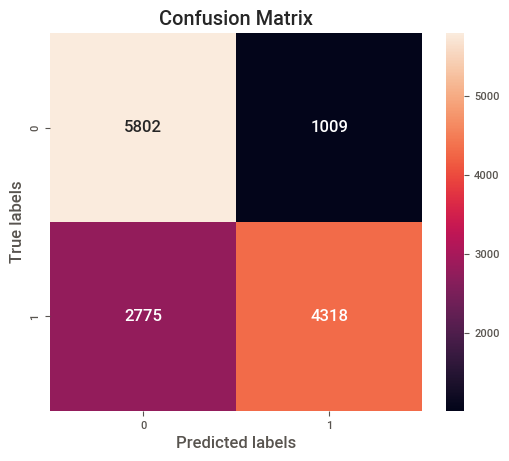

In [62]:
matrix = confusion_matrix(target_test, predicted_test)
plt.figure(figsize=(6, 5))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, fmt='g', ax=ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

Наибольшее число ошибок модель делает при предсказании класса `1`.

Выделим важные признаки нашей модели.

In [63]:
model = CatBoostClassifier(depth=6, iterations=100, learning_rate=0.1, verbose=False)
model.fit(features_train, target_train)
explainer = shap.Explainer(model)

shap_values_1 = explainer(features_train)
shap_values_2 = shap.TreeExplainer(model).shap_values(features_train)

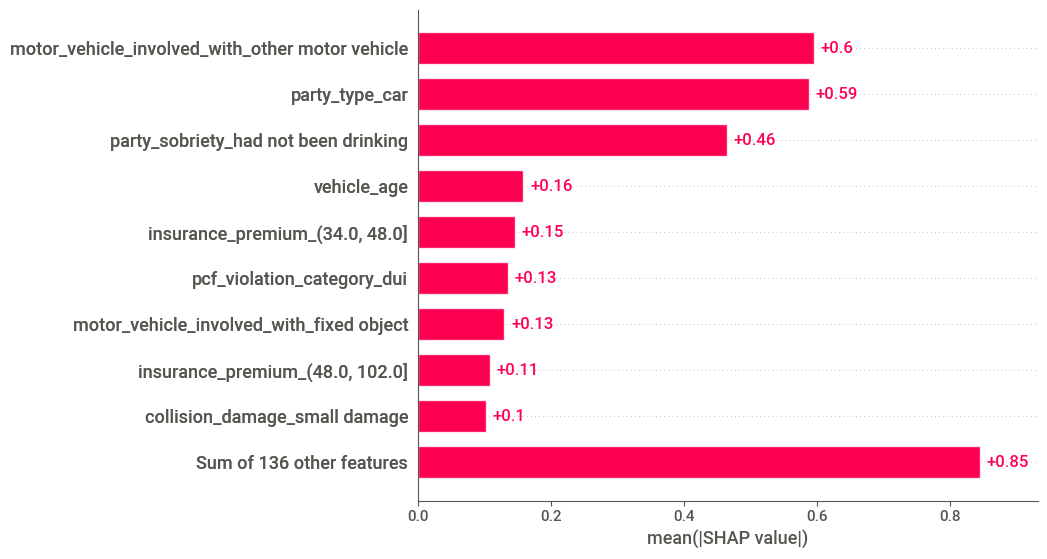

In [64]:
shap.plots.bar(shap_values_1)

ТОП-5 важных факторов нашей модели:

    - Дополнительные участники ДТП (другой авто)
    - Тип участника происшествия (авто)
    - Трезвость участника (не пил)
    - Возраст автомобиля (в годах)
    - Сумма страховки (в промежетке (34, 48])

Посмотрим на них подробнее.

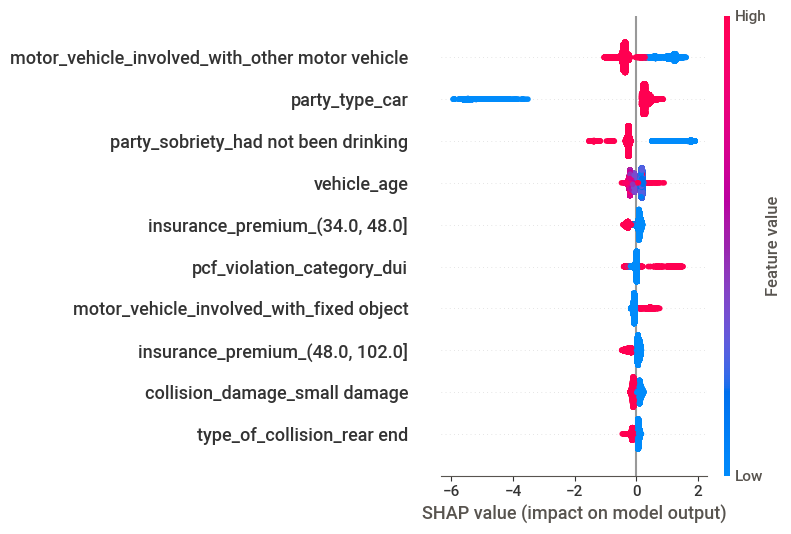

In [65]:
shap.summary_plot(shap_values_2, features_train, max_display=10, plot_size='auto')

Значения слева от центральной вертикальной линии — это negative класс (0), справа — positive (1).
Чем толще линия на графике, тем больше таких точек наблюдения. Чем краснее точки на графике, тем выше значения признака в ней.

    - Дополнительные участники ДТП (другой авто): значение '1' повышает вероятность класса '0'.  
    - Тип участника происшествия (авто): значение '1' повышает вероятность класса '1', хорошо разделяет данные на классы 0/1
    - Трезвость участника (не пил): значение '1' повышает вероятность класса '0', хорошо разделяет данные на классы 0/1 
    - Возраст автомобиля (в годах): низкие значения повышают вероятность класса '1', при возрастании картина меняется на противоположную, а затем при высоких значениях признака вновь повышается вероятность класса '1'.
    - Сумма страховки (в промежетке (34, 48]): значение '1' повышает вероятность класса '0'.  


## Выводы

In [66]:
print('\nМодель с лучшим значением F1 на train: %s' % grid_dict[best_clf])
print('\nF1 на тестовой выборке: {:.3f}'.format(f1_score(target_test, predicted_test)))    


Модель с лучшим значением F1 на train: CatBoost

F1 на тестовой выборке: 0.695


Полученная нами модели не сильно отличается от исcкусственной. Вероятно, для получения адекватной системы оценки водительского риска требуется пересмотреть список используемых параметров или учесть дополнительные факторы. 
Такими могут стать:
    
    - водительский стаж;
    - история поведения клиента в сервисе;
    - количество перекрестков на маршруте;
    - количество опасных участков на маршруте.

Рекомендуется обратить внимание на периодичность обновления автопарка компании (наша модель в качестве важного фактора выделила возраст авто). 

Рекомендуется принять предупредительные меры против самых частых категорий нарушений. Например:
    
    - превышение скорости: установить порог скорости, при его превышении предупреждать водителя; ввести штрафные санкции за нарушение.
    - неправильный поворот: голосовое предупреждение об опасных участках дороги. 
    - автомобильное право проезда: голосовое предупреждение об опасных участках дороги. 
    